# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: Permutation testing
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

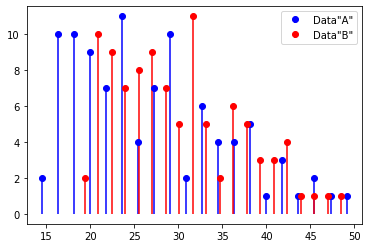

In [2]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [3]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))

In [4]:
np.concatenate( (alldata.reshape(-1, 1), conds.reshape(-1, 1)), 1 )[95:105]

array([[36.10963402,  1.        ],
       [37.41889637,  1.        ],
       [18.1925198 ,  1.        ],
       [29.63098   ,  1.        ],
       [19.62519667,  1.        ],
       [34.19319159,  2.        ],
       [37.44515155,  2.        ],
       [49.29071518,  2.        ],
       [37.25728938,  2.        ],
       [28.346871  ,  2.        ]])

In [5]:
## generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2


# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])


[26.734464090761985, 29.903728534025205]
[27.604552507037123, 29.033640117750057]


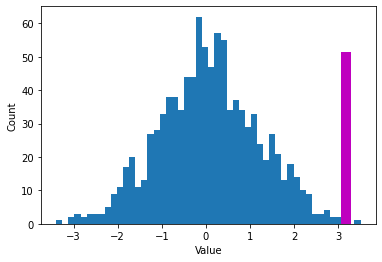

In [6]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [7]:
## two methods of evaluating statistical significance

# Z-value
zVal = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.002891109806615999 0.001
